In [ ]:
#@title Librerias
import numpy as np
from numpy.linalg import solve
import math
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.interpolate import CubicHermiteSpline
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Ana Sofia Del Rio
*Métodos computacionales 2025-I*

---

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

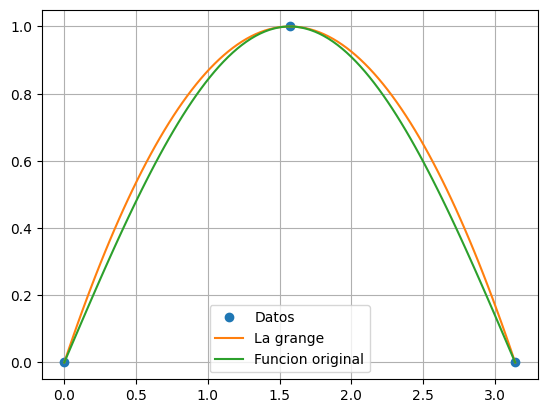

El error asociado al polinomio de Lagrange es:


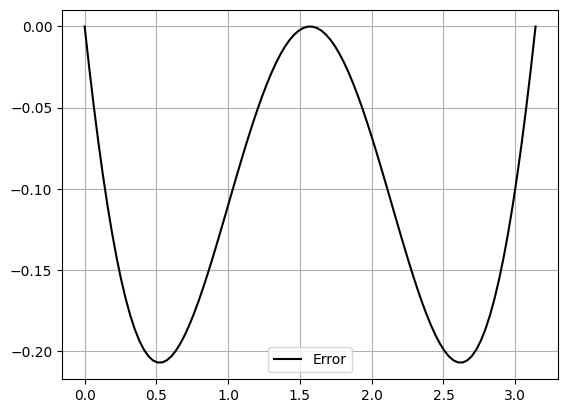

In [ ]:
# Puntos de interpolación
x_vals = np.array([0, np.pi/2, np.pi])
f = lambda x: np.sin(x)
y = f(x_vals)

#Polinomio de Lagrange
p_l = lagrange(x_vals, y)

x_interp = np.linspace(0, np.pi, 100)
y_interp = f(x_interp)

# Cálculo del error
n = len(x_vals) - 1  # Grado del polinomio
# Derivada de orden 3 de sin(x) es -cos(x)
df_3 = lambda x: -np.cos(x)
error = lambda x: (1/math.factorial(n+1))*df_3(x)*(x-x_vals[0])*(x-x_vals[1])*(x-x_vals[2])

plt.plot(x_vals, y, 'o', label='Datos')
plt.plot(x_interp, p_l(x_interp), label= 'La grange')
plt.plot(x_interp, f(x_interp), label = 'Funcion original')
plt.grid()
plt.legend()
plt.show()

print(f'El error asociado al polinomio de Lagrange es:')
plt.plot(x_interp, error(x_interp), label='Error', color= 'black')
plt.grid()
plt.legend()
plt.show()

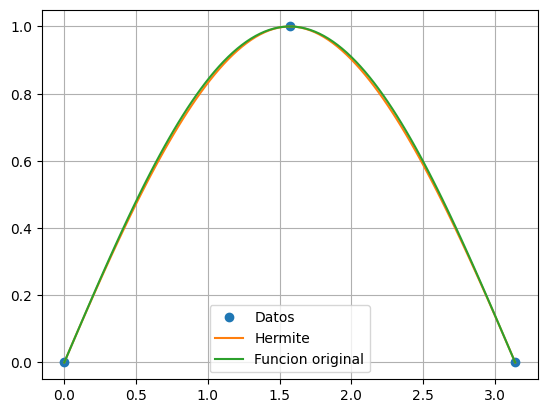

El error asociado al polinomio de Hermite es:


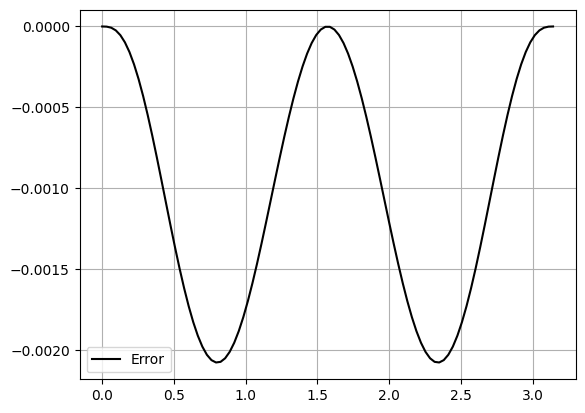

In [ ]:
# Puntos de interpolación
x_vals = np.array([0, np.pi/2, np.pi])
f = lambda x: np.sin(x)
y = f(x_vals)
df = lambda x: np.cos(x)
dy= df(x_vals)

#Polinomio de Hermite
p_h= CubicHermiteSpline(x_vals, y, dy)

# Cálculo del error
n = len(x_vals) - 1  # Grado del polinomio

# Derivada de orden 6 de sin(x) es -sen(x)
df_6 = lambda x: -np.sin(x)
error = lambda x: ((1/math.factorial(2*n+2))*(df_6(x))*((x-x_vals[0])**2)*((x-x_vals[1])**2)*((x-x_vals[2])**2))
x_interp = np.linspace(min(x_vals), max(x_vals), 100)

plt.plot(x_vals, y, 'o', label='Datos')
plt.plot(x_interp, p_h(x_interp), label= 'Hermite')
plt.plot(x_interp, f(x_interp), label = 'Funcion original')
plt.grid()
plt.legend()
plt.show()

print(f'El error asociado al polinomio de Hermite es:')
plt.plot(x_interp, error(x_interp), label='Error', color= 'black')
plt.grid()
plt.legend()
plt.show()


# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [ ]:
#Utilizamos la función que calcúña el polinomio de Newton visto en clase
def diferencia_dividida(x, y, i, j):
    '''
    Calcula recursivamente la diferencia dividida f[x_i, x_{i+1}, ..., x_j]
    Entradas:
      x: array de puntos x
      y: array de puntos y
      i: indice del primer punto
      j: indice del ultimo punto
    Salidas:
      a: coeficiente diferencia dividida (i,j)
    '''
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
        return num / den

def coeficientes_a(x, y):
    '''
    Calcula los coeficientes a_i del polinomio de Newton.
    Entradas:
      x: array de puntos x
      y: array de puntos y
    Salidas:
      coeficientes: array de coeficientes a_i
    '''
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
  '''
  Calcula el polinomio de Newton a partir de los puntos (x, y)
  Entradas:
    x: array de puntos x
    y: array de puntos y
  Salidas:
    P: polinomio de Newton como una función de x
  '''
  coef = coeficientes_a(x, y)
  def P(x_val):
    resultado = coef[0]
    producto = 1
    for i in range(1, len(x)):
      producto *= (x_val - x[i - 1])
      resultado += coef[i] * producto
    return resultado
  return P


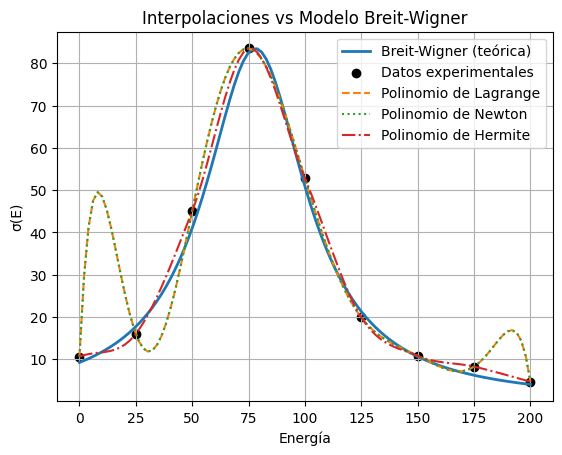

In [ ]:
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
E_r= 78
gamma= 55

def Breit(E, sigma_0):
  return sigma_0/(((E - E_r)**2) + ((gamma**2)/4))

d_sigma= np.gradient(sigma_exp, Energia)
#Polinomio de Lagrange, Newton, Hermite
p_l = lagrange(Energia, sigma_exp)
p_n= Polinomio_Newton(Energia, sigma_exp)
p_h= CubicHermiteSpline(Energia, sigma_exp, d_sigma)

x_interp = np.linspace(0, 200, 100)

sigma_max = 83.5
sigma_0 = sigma_max * (gamma**2) / 4
sigma_teorica = Breit(x_interp, sigma_0)
lagrange_vals = p_l(x_interp)
newton_vals = p_n(x_interp)
hermite_vals = p_h(x_interp)

#Grafica de los polinomios junto con la función original
plt.plot(x_interp, sigma_teorica, label='Breit-Wigner (teórica)', linewidth=2)
plt.scatter(Energia, sigma_exp, color='black', label='Datos experimentales')
plt.plot(x_interp, lagrange_vals, '--', label='Polinomio de Lagrange')
plt.plot(x_interp, newton_vals, ':', label='Polinomio de Newton')
plt.plot(x_interp, hermite_vals, '-.', label='Polinomio de Hermite')
plt.xlabel('Energía')
plt.ylabel('σ(E)')
plt.title('Interpolaciones vs Modelo Breit-Wigner')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Calculo del error
error_lagrange = np.max(np.abs(sigma_teorica - lagrange_vals))
error_newton   = np.max(np.abs(sigma_teorica - newton_vals))
error_hermite  = np.max(np.abs(sigma_teorica - hermite_vals))

print(f'Error máximo Lagrange: {error_lagrange}')
print(f'Error máximo Newton:   {error_newton}')
print(f'Error máximo Hermite:  {error_hermite}')
print('El mejor polinomio es el de Hermite')

Error máximo Lagrange: 38.33031026744193
Error máximo Newton:   38.330310267442
Error máximo Hermite:  4.610679651700707
El mejor polinomio es el de Hermite


# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

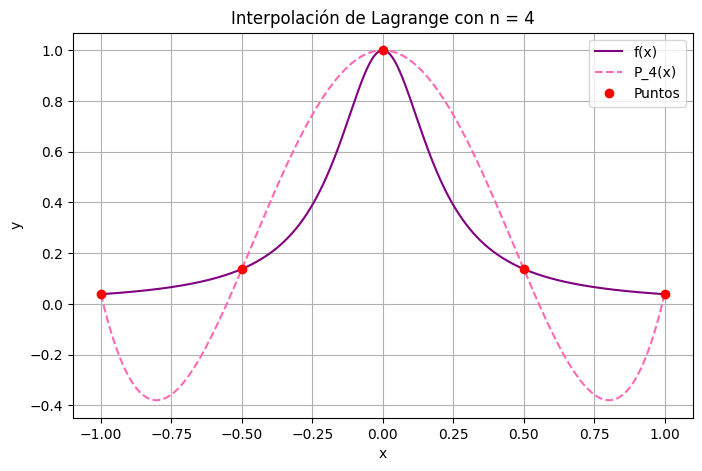

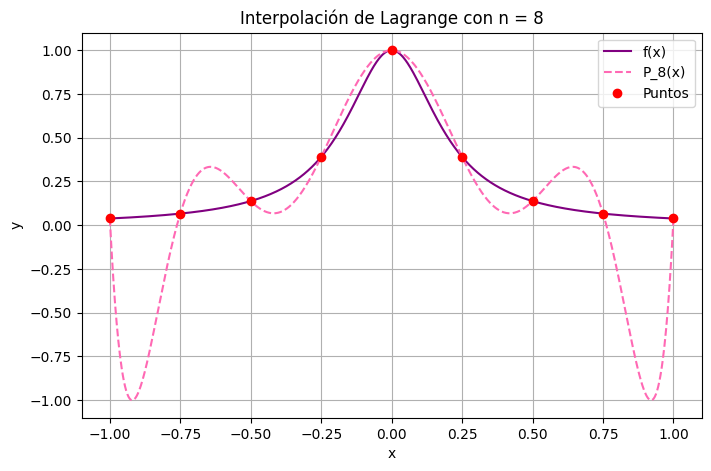

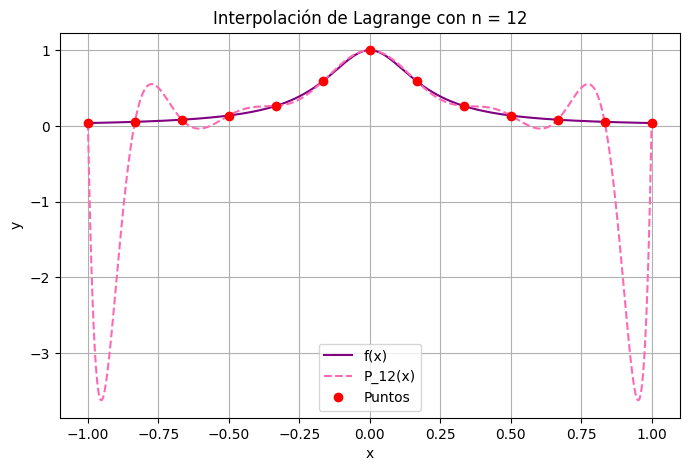

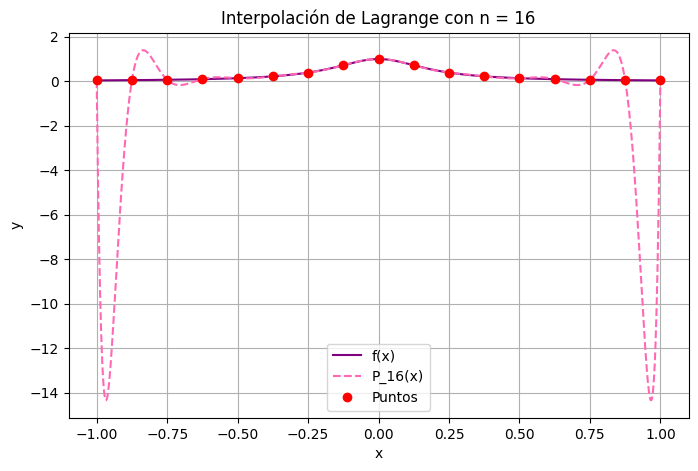

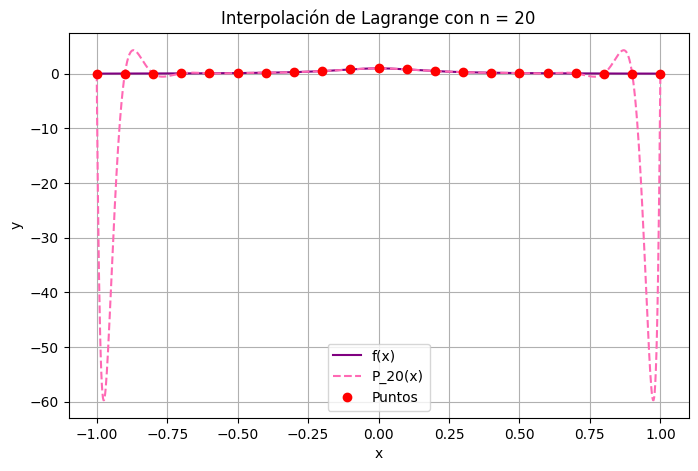

In [ ]:
def f(x):
    return 1 / (1 + 25 * x**2)

n_vals = [4, 8, 12, 16, 20]
x_vals = np.linspace(-1, 1, 1000)
y_vals = f(x_vals)

for n in n_vals:
    x = np.linspace(-1, 1, n + 1)
    y = f(x)

    # Interpolación de Lagrange
    P = lagrange(x, y)
    y_interp = P(x_vals)

    # Graficar
    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, y_vals, label='f(x)', color='purple')
    plt.plot(x_vals, y_interp, label=f'P_{n}(x)', color= 'hotpink', linestyle='--')
    plt.plot(x, y, 'ro', label='Puntos')
    plt.title(f'Interpolación de Lagrange con n = {n}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.show()

In [ ]:
#Calculo del error
x = sp.Symbol('x')
f = 1 / (1 + 25 * x**2)

# Derivada de orden n+1 con n=4, 5ta derivada
n = 4
dff = f.diff(x, n + 1)
df = sp.lambdify(x, sp.Abs(dff), 'numpy')

# Evaluar en varios puntos para encontrar el máximo valor absoluto
x_vals = np.linspace(-1, 1, 1000)
M = np.max(df(x_vals))  # Esta es la cota de |f^(n+1)(ξ)|

# Puntos de interpolación equiespaciados
x_interp = np.linspace(-1, 1, n + 1)

# Punto a evaluar
x0 = 0.5

omega = np.prod([x0 - xi for xi in x_interp])

# Cálculo del error
error = M * abs(omega) / math.factorial(n + 1)

print(f'Máximo de |f^(5)(ξ)| en [-1, 1]: {M:.5e}')
print(f'Producto ω(x) = (x - x_0)...(x - x_n) en x=0.5: {omega}')
print(f'Cota del error para n={n} en x=0.5: {error}')

Máximo de |f^(5)(ξ)| en [-1, 1]: 3.13877e+05
Producto ω(x) = (x - x_0)...(x - x_n) en x=0.5: -0.0
Cota del error para n=4 en x=0.5: 0.0


# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

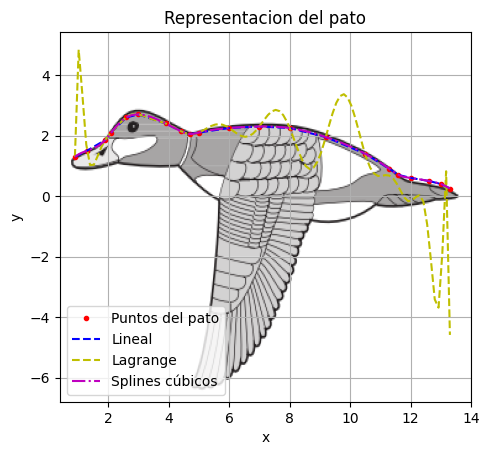

In [ ]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

x_interp = np.linspace(min(xp), max(xp), 100)
#Interpolación lineal
int_lineal = interp1d(xp, yp)
f_lineal = int_lineal(x_interp)
#Polinomio de interpolación de lagrange
p_lagrange = lagrange(xp, yp)
f_lagrange = p_lagrange(x_interp)
#interpolación mediante splines cúbicos
p_spline = CubicSpline(xp, yp)
f_spline = p_spline(x_interp)


# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, '.r', label='Puntos del pato')
plt.plot(x_interp, f_lineal, 'b--', label='Lineal')
plt.plot(x_interp, f_lagrange, 'y--', label='Lagrange')
plt.plot(x_interp, f_spline, 'm-.', label='Splines cúbicos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

#La que más oscila es la de Lagrange

# 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

In [ ]:
x_vals = np.array([-1, 0, 1, 2])
y_vals = np.array([5, 3, 3, 4])

x0, x1, x2, x3= -1, 0, 1, 2
y0, y1, y2, y3= 5, 3, 3, 4

Para calcular el spline cúbico que interpola estos puntos necesitamos resolver el sistema de ecuaciones que define a los coeficientes de los polinomios en los intervalos dados.
De esta manera obtenemos los coeficientes:

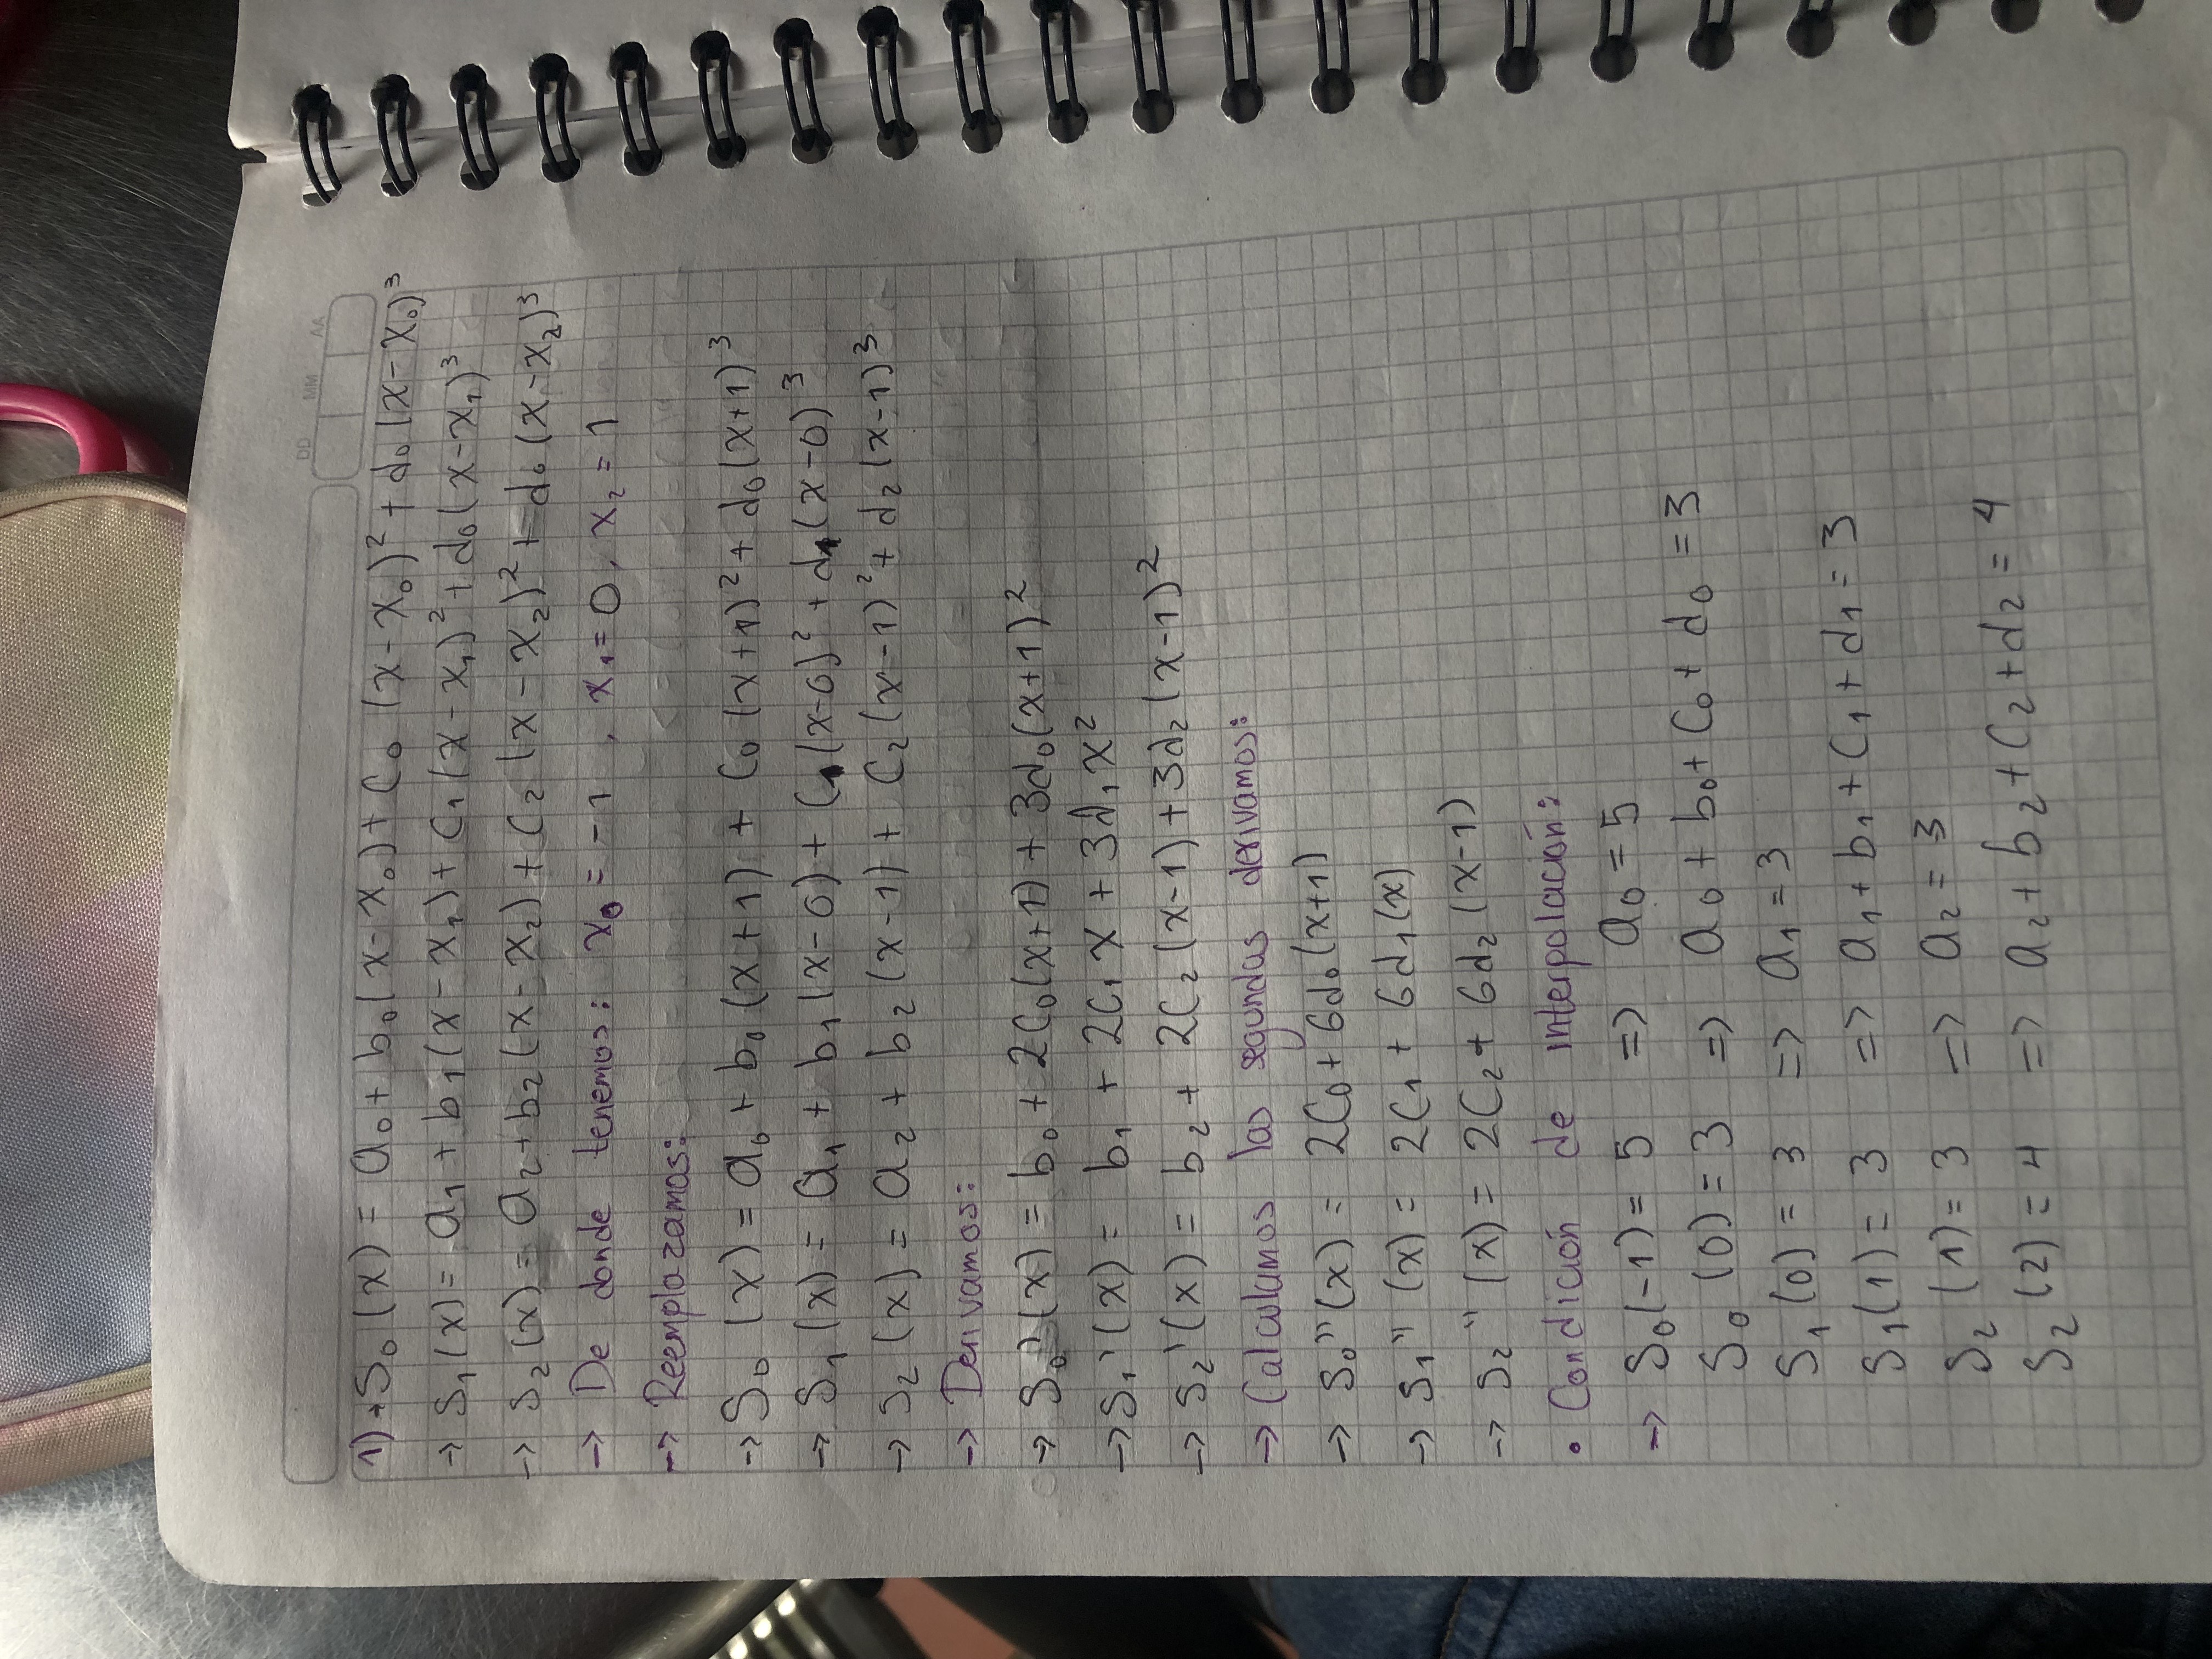

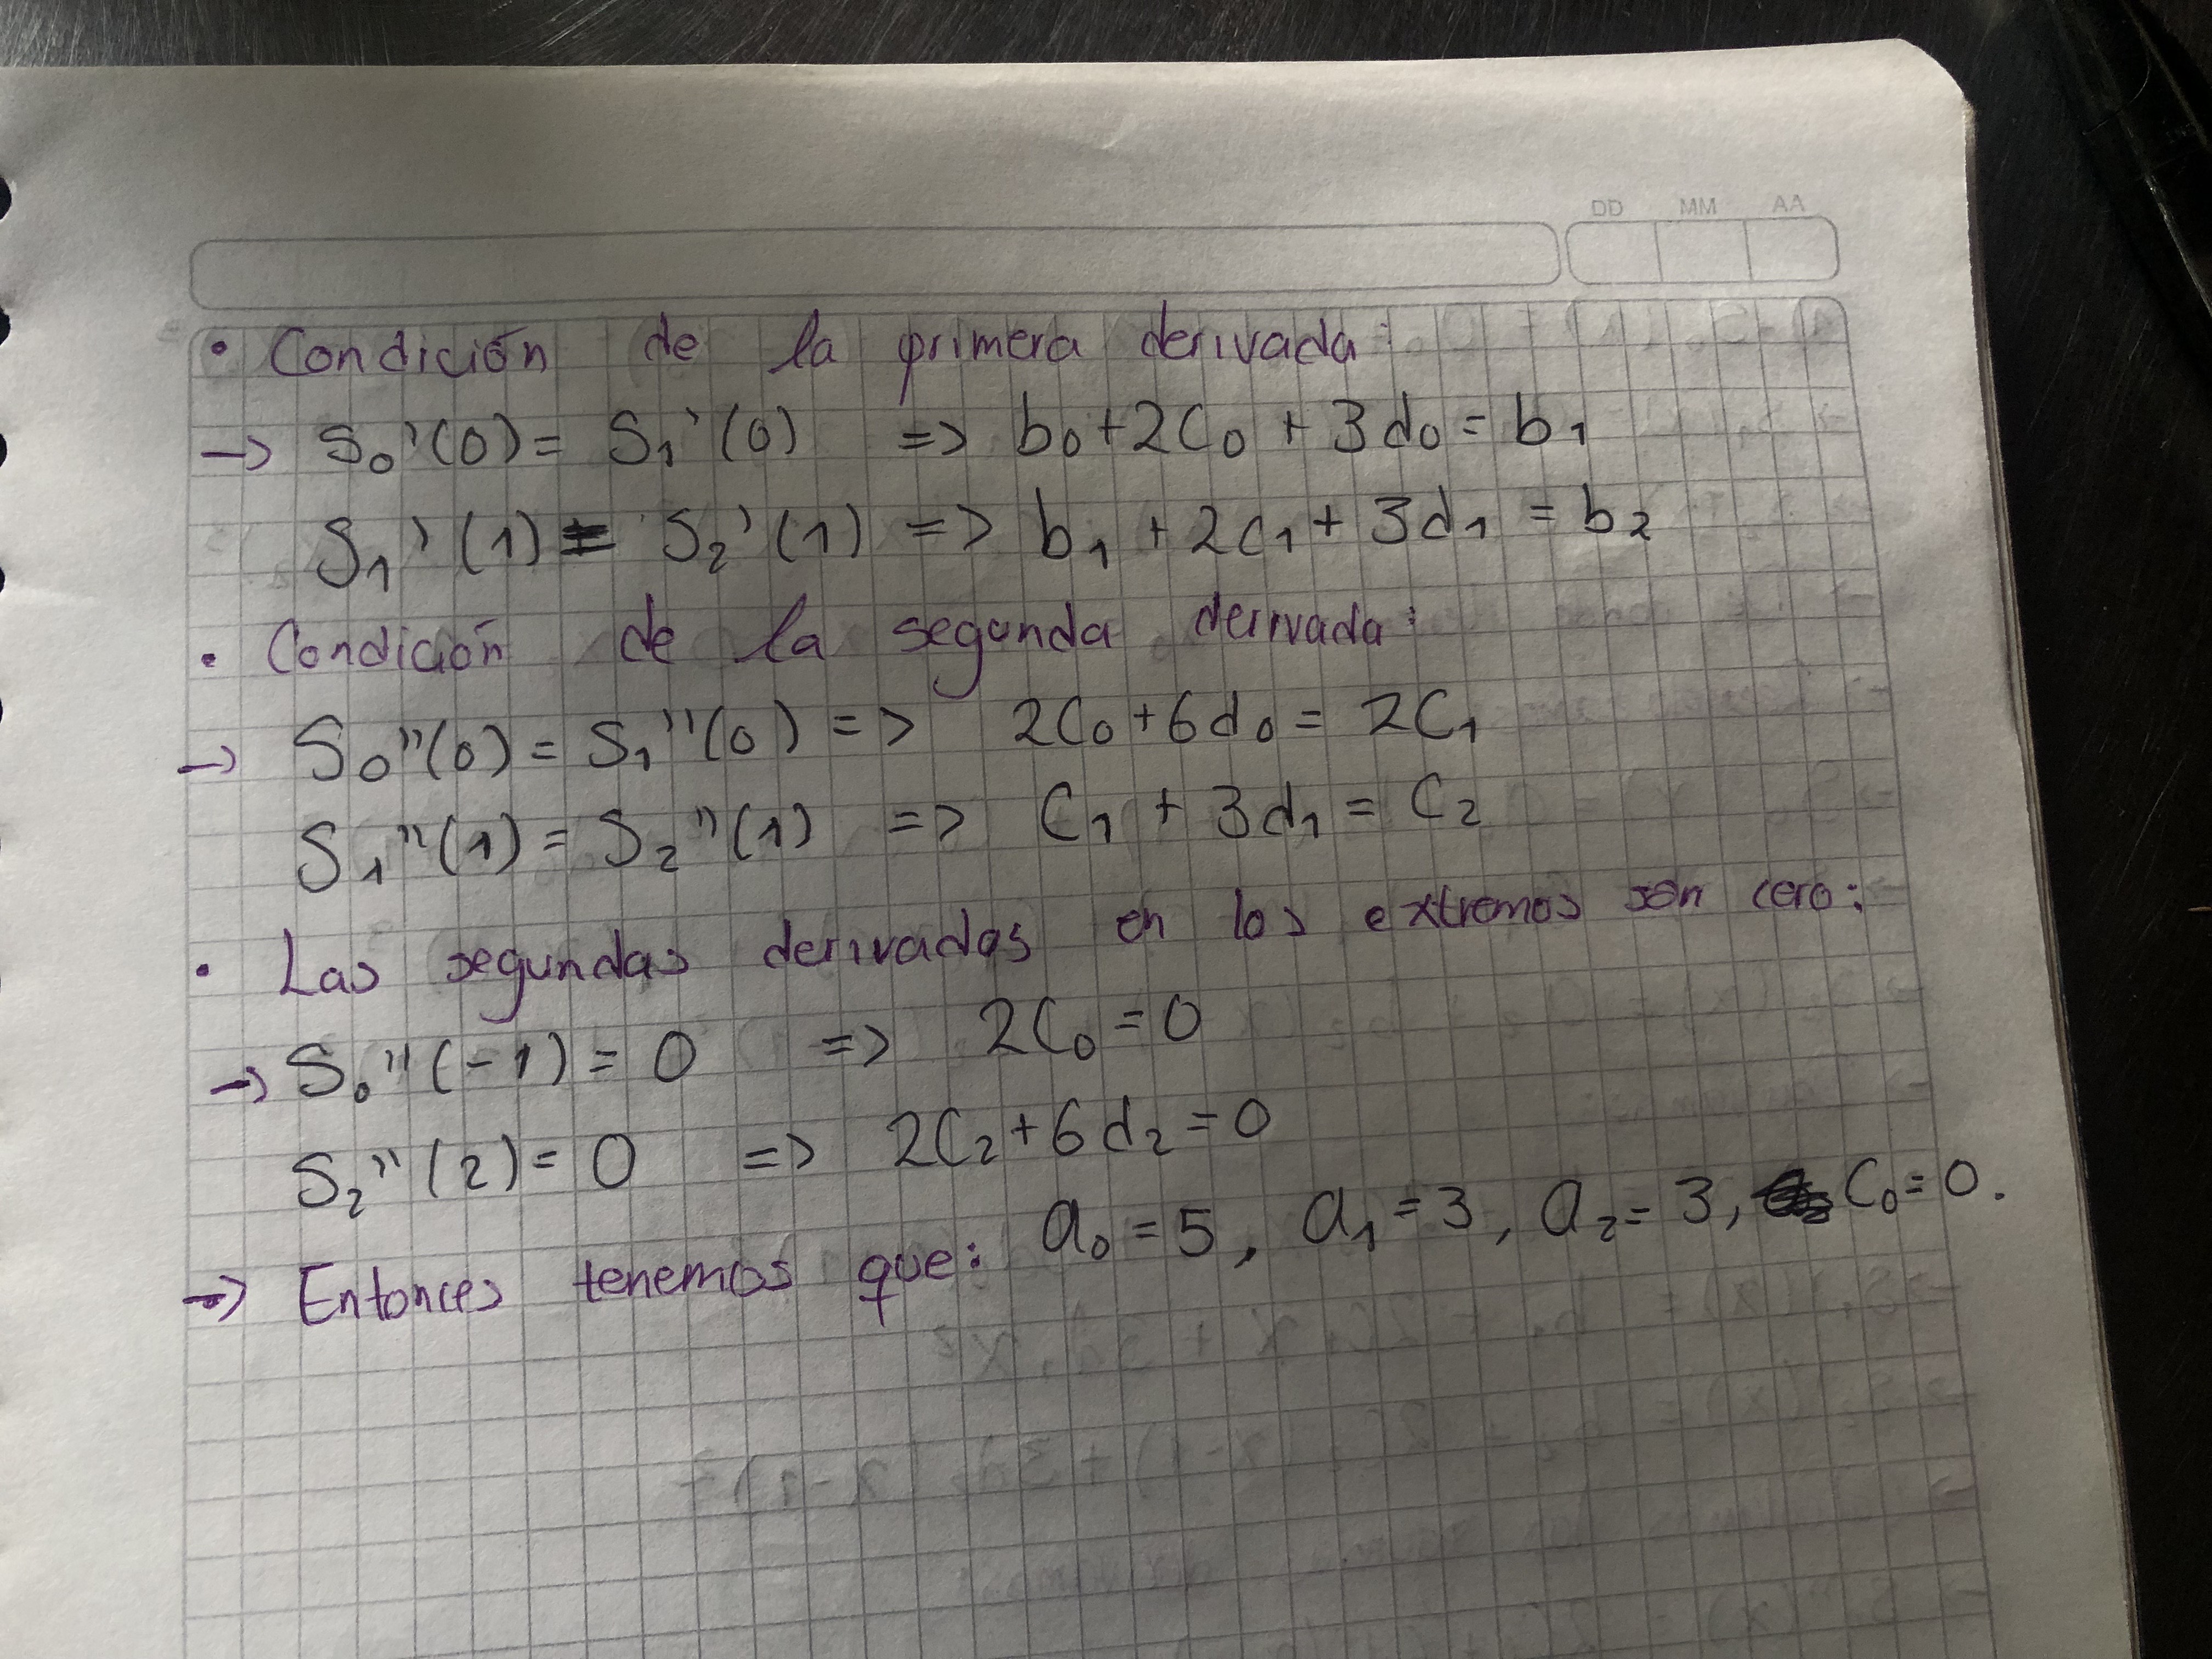

In [ ]:
#Coeficientes
a_0 = 5
a_1 = 3
a_2 = 3
c_0 = 0

Una vez encontrados estos coeficientes, tenemos entonces un sistema de 8 incognitas y 8 ecuaciones, por lo tanto, reemplazando los valores podemos encontrar la matriz asociada al sistema de ecuaciones:

In [ ]:
A= np.array([
    [1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [1, 3, -1, 0, 0, 0, 0, 0],
    [0, 0, 1, 2, 3, -1, 0, 0],
    [0, 3, 0, -1, 0, 0, 0, 0],
    [0, 0, 0, 1, 3, 0, -1, 0],
    [0, 0, 0, 0, 0, 0, 1, 3]
])

B= np.array([-2, 0, 1, 0, 0, 0, 0, 0])

#Resolvemos
sol = solve(A, B)
b_0, d_0, b_1, c_1, d_1, b_2, c_2, d_2 = sol
print(f'Los coeficientes son: {sol}')

Los coeficientes son: [-2.46666667  0.46666667 -1.06666667  1.4        -0.33333333  0.73333333
  0.4        -0.13333333]


In [ ]:
#Polinomios de interpolación
#S_0(x)
x = sp.Symbol('x')
x0, x1, x2= -1, 0,1
S_0= a_0 + b_0*(x-x0) + c_0*(x-x0)**2 + d_0*(x-x0)**3
print(sp.expand(S_0))
#S_1(x)
S_1= a_1 + b_1*(x-x1) + c_1*(x-x1)**2 + d_1*(x-x1)**3
print(sp.expand(S_1))
#S_2(x)
S_2= a_2 + b_2*(x-x2) + c_2*(x-x2)**2 + d_2*(x-x2)**3
print(sp.expand(S_2))

0.466666666666667*x**3 + 1.4*x**2 - 1.06666666666667*x + 3.0
-0.333333333333333*x**3 + 1.4*x**2 - 1.06666666666667*x + 3
-0.133333333333333*x**3 + 0.8*x**2 - 0.466666666666667*x + 2.8


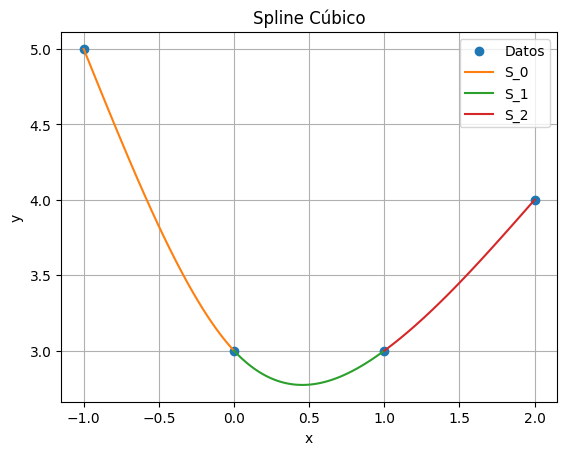

In [ ]:
#'Lambdificamos'
S0 = sp.lambdify(x, S_0)
S1 = sp.lambdify(x, S_1)
S2 = sp.lambdify(x, S_2)

x_0 = np.linspace(x_vals[0], x_vals[1], 100)
x_1 = np.linspace(x_vals[1], x_vals[2], 100)
x_2 = np.linspace(x_vals[2], x_vals[3], 100)

#Graficamos
plt.plot(x_vals, y_vals, 'o', label='Datos')
plt.plot(x_0, S0(x_0), label= 'S_0')
plt.plot(x_1, S1(x_1), label= 'S_1')
plt.plot(x_2, S2(x_2), label= 'S_2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Spline Cúbico')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Comparamos y evaluamos en x= 1.5
c_s= CubicSpline(x_vals, y_vals)
x= 1.5
y= c_s(x)

resultado= S2(x)

print(f'Con x= 1.5: {resultado}')
print(f'Con el Spline evaluado en scipy en x= 1.5: {y}')

Con x= 1.5: 3.450000000000003
Con el Spline evaluado en scipy en x= 1.5: 3.4375
